In [1]:

# Inline functions extracted from .py files

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Example function for support and resistance visualization
def support_and_resistance(data, title='Support and Resistance Example'):
    plt.figure(figsize=(15, 7))
    plt.plot(data['Date'], data['Close'], label='Close Prices', color='blue')
    plt.axhline(y=data['Close'].max(), color='red', linestyle='--', label='Resistance Level')
    plt.axhline(y=data['Close'].min(), color='green', linestyle='--', label='Support Level')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Example function for time series decomposition
def time_series_decomposition(ts, period=12):
    decomposition = seasonal_decompose(ts, model='additive', period=period)
    fig = decomposition.plot()
    fig.set_size_inches(15, 8)
    plt.show()


In [2]:
!pip install yfinance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yfinance import download
from datetime import datetime
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.api import OLS, add_constant
import datetime as dt

In [ ]:
# Define the date range for fetching data
start_date = '2024-01-01'
end_date = '2024-12-31'

# Fetch data using yfinance
def fetch_stock_data(ticker):
    return download(ticker, start=start_date, end=end_date)

# Get FAANG data
fb = fetch_stock_data('META')
aapl = fetch_stock_data('AAPL')
amzn = fetch_stock_data('AMZN')
nflx = fetch_stock_data('NFLX')
goog = fetch_stock_data('GOOG')

# Get S&P 500 data
sp = fetch_stock_data('^GSPC')

# Get bitcoin data in USD
bitcoin = fetch_stock_data('BTC-USD')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# Group FAANG stocks
def group_stocks(stock_dict):
    return pd.concat({key: stock["Close"] for key, stock in stock_dict.items()}, axis=1)

# Data groups
faang = group_stocks(
    {
        'Facebook': fb, 
        'Apple': aapl, 
        'Amazon': amzn, 
        'Netflix': nflx, 
        'Google': goog
    }
)

faang_sp = group_stocks(
    {
        'Facebook': fb, 
        'Apple': aapl, 
        'Amazon': amzn, 
        'Netflix': nflx, 
        'Google': goog,
        'S&P 500': sp
    }
)

all_assets = group_stocks(
    {
        'Bitcoin': bitcoin,
        'S&P 500': sp,
        'Facebook': fb, 
        'Apple': aapl, 
        'Amazon': amzn, 
        'Netflix': nflx, 
        'Google': goog
    }
)

In [26]:
import pandas as pd
import os

# Define the dataset directory
dataset_dir = r"C:\\Users\\alanm\\OneDrive\\Documents\\Hands-On-Data-Analysis-with-Pandas-2nd-edition\\Hands-On-Data-Analysis-with-Pandas-2nd-edition-1\\ch_07"

# Define file names for all datasets
file_names = {
    "Amazon": "AMZN_data.csv",
    "Apple": "AAPL_data.csv",
    "Bitcoin": "BTC-USD_data.csv",
    "Facebook": "META_data.csv",
    "Google": "GOOG_data.csv",
    "Netflix": "NFLX_data.csv",
    "S&P 500": "^GSPC_data.csv"
}

# Define a function to process each dataset and compute summary statistics
def process_data(file_path):
    # Read data
    df = pd.read_csv(file_path)
    # Ensure the necessary columns exist and clean data
    df = df.rename(columns=lambda x: x.strip())
    if 'Close' in df.columns:
        df['Close'] = pd.to_numeric(df['Close'], errors='coerce')  # Ensure 'Close' is numeric
        return df['Close'].describe()  # Compute summary statistics for the 'Close' column

# Read and process all datasets into a group_stocks structure
all_assets = {
    name: process_data(os.path.join(dataset_dir, file_name))
    for name, file_name in file_names.items()
}

# Convert to DataFrame and structure rows and columns as specified
summary_df = pd.DataFrame(all_assets).T
summary_df.rename(
    columns={
        "count": "Count",
        "mean": "Mean",
        "std": "Std",
        "min": "Min",
        "25%": "25%",
        "50%": "50%",
        "75%": "75%",
        "max": "Max"
    },
    inplace=True
)

# Ensure the rows are named properly
summary_df.index.name = "Stock"

# Display the final summary DataFrame
from IPython.display import display
display(summary_df)




,Count,Mean,Std,Min,25%,50%,75%,Max
Stock,,,,,,,,
Amazon,251.0,184.490199,17.322854,144.570007,175.370003,183.320007,189.599998,232.929993
Apple,251.0,206.596169,25.617883,164.405121,183.418915,213.757141,227.088608,259.019989
Bitcoin,365.0,65888.868290,14632.134647,39507.367188,59027.625000,64118.792969,69122.335938,106140.601562
Facebook,251.0,507.971077,62.408398,343.159149,474.502274,503.792603,562.756073,632.170044
Google,251.0,164.779143,15.502509,132.085388,152.795990,165.972977,176.108124,198.160004
Netflix,251.0,670.624462,109.578031,468.500000,608.980011,647.659973,706.854980,936.559998
S&P 500,251.0,5426.428765,367.685189,4688.680176,5134.015137,5434.430176,5716.104980,6090.270020


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Flattened Columns in AAPL DataFrame:
Index(['AAPL_('Close', 'AAPL')', 'AAPL_('High', 'AAPL')',
       'AAPL_('Low', 'AAPL')', 'AAPL_('Open', 'AAPL')',
       'AAPL_('Volume', 'AAPL')'],
      dtype='object')


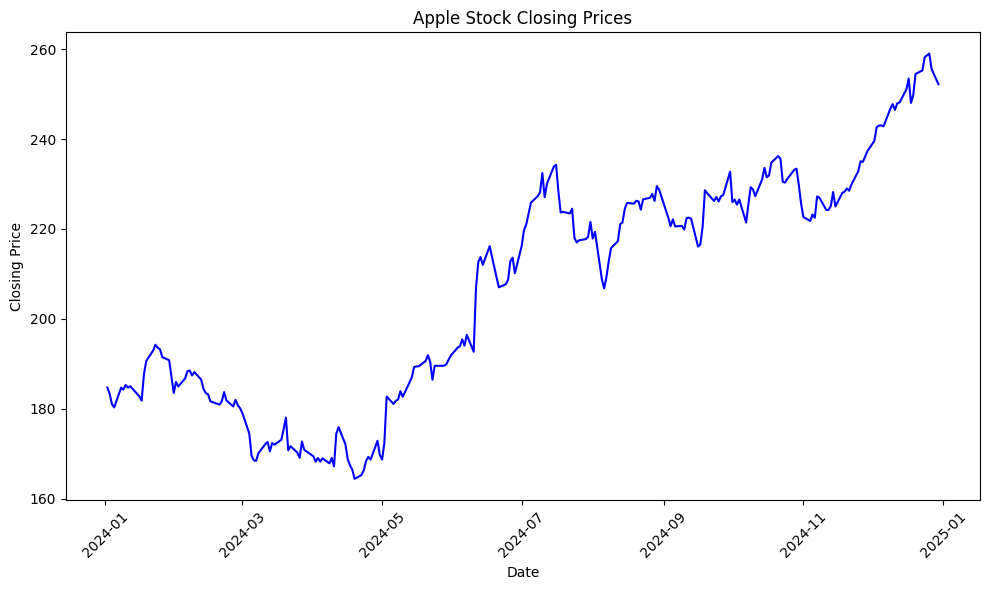

In [5]:
# Fetch data using yfinance
def fetch_stock_data(ticker):
    data = download(ticker, start=start_date, end=end_date)
    data.columns = [f"{ticker}_{col}" for col in data.columns]  # Prefix columns with ticker symbol
    return data

# Fetch data again to ensure column names are updated
fb = fetch_stock_data('META')
aapl = fetch_stock_data('AAPL')
amzn = fetch_stock_data('AMZN')
nflx = fetch_stock_data('NFLX')
goog = fetch_stock_data('GOOG')
sp = fetch_stock_data('^GSPC')
bitcoin = fetch_stock_data('BTC-USD')

# Debug: Check the updated column names
print("Flattened Columns in AAPL DataFrame:")
print(aapl.columns)

# Check for the closing price column
closing_column = None
for col in aapl.columns:
    if 'Close' in col:
        closing_column = col
        break

if closing_column is None:
    raise KeyError("Column for closing prices not found. Available columns: " + ', '.join(aapl.columns))

# Example plot: Apple stock closing prices
plt.figure(figsize=(10, 6))
sns.lineplot(x=aapl.index, y=aapl[closing_column], color="blue")
plt.title("Apple Stock Closing Prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


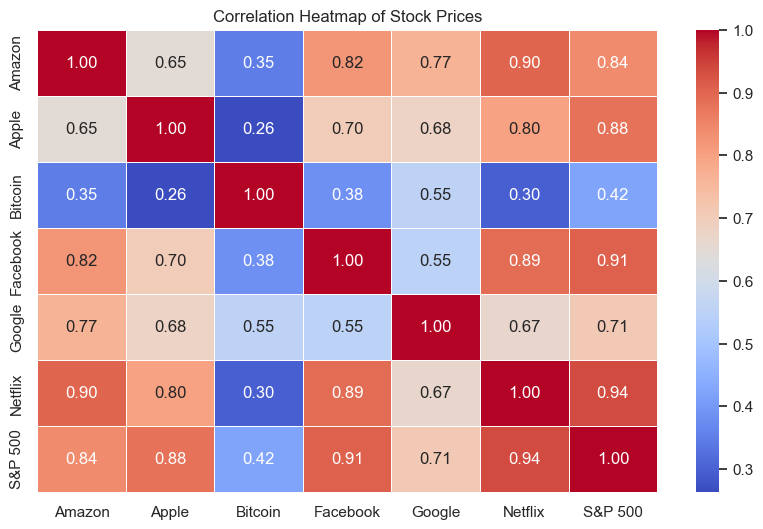

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Define the dataset directory
dataset_dir = r"C:\\Users\\alanm\\OneDrive\\Documents\\Hands-On-Data-Analysis-with-Pandas-2nd-edition\\Hands-On-Data-Analysis-with-Pandas-2nd-edition-1\\ch_07"

# Define file names for all datasets
file_names = {
    "Amazon": "AMZN_data.csv",
    "Apple": "AAPL_data.csv",
    "Bitcoin": "BTC-USD_data.csv",
    "Facebook": "META_data.csv",
    "Google": "GOOG_data.csv",
    "Netflix": "NFLX_data.csv",
    "S&P 500": "^GSPC_data.csv"
}

# Load datasets and extract 'Close' prices
data = {}
for name, file_name in file_names.items():
    file_path = os.path.join(dataset_dir, file_name)
    df = pd.read_csv(file_path)
    df = df.rename(columns=lambda x: x.strip())
    if 'Close' in df.columns:
        df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
        data[name] = df['Close']

# Create a DataFrame with all assets' 'Close' prices
close_prices = pd.DataFrame(data)

# Compute the correlation matrix
correlation_matrix = close_prices.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Stock Prices")
plt.show()

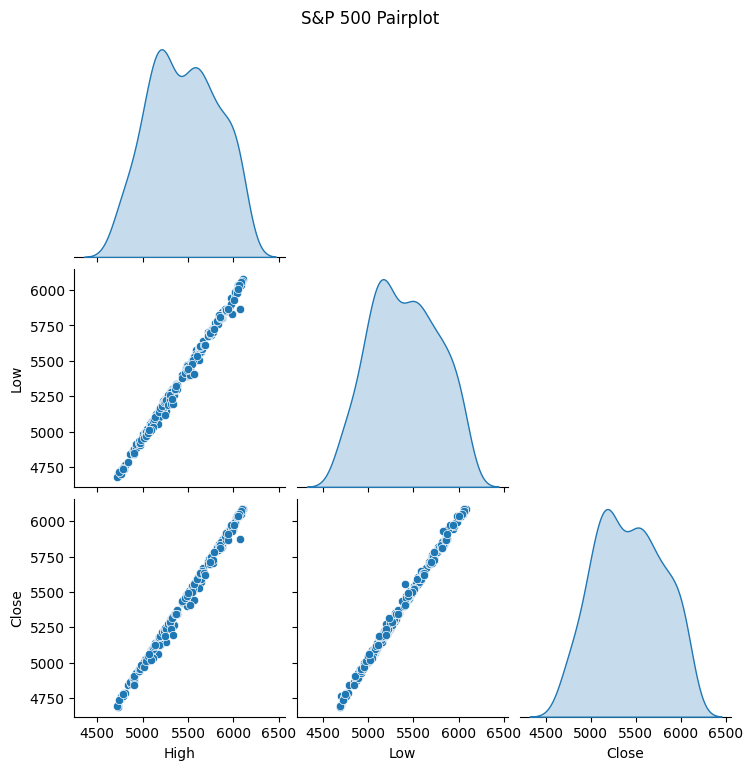

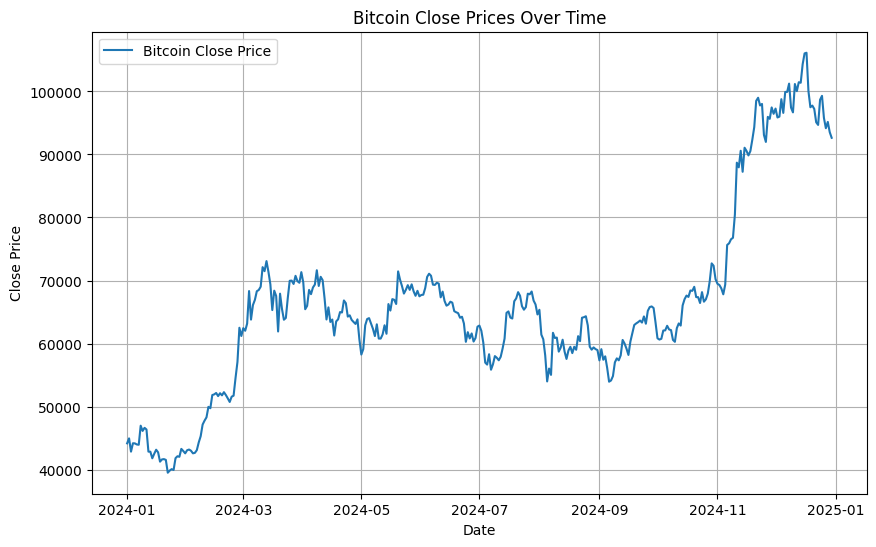

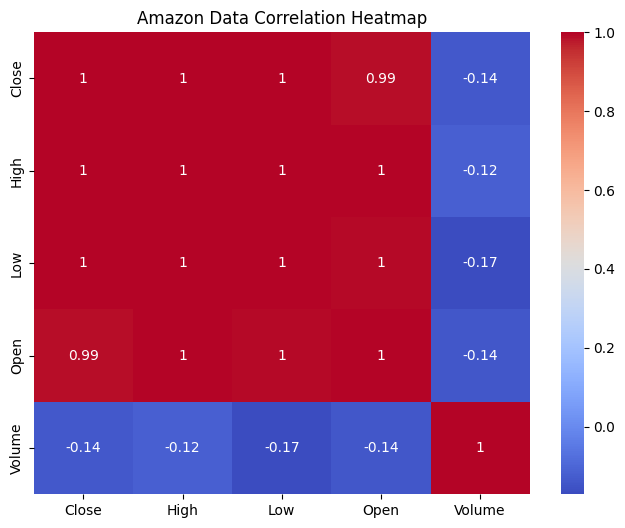

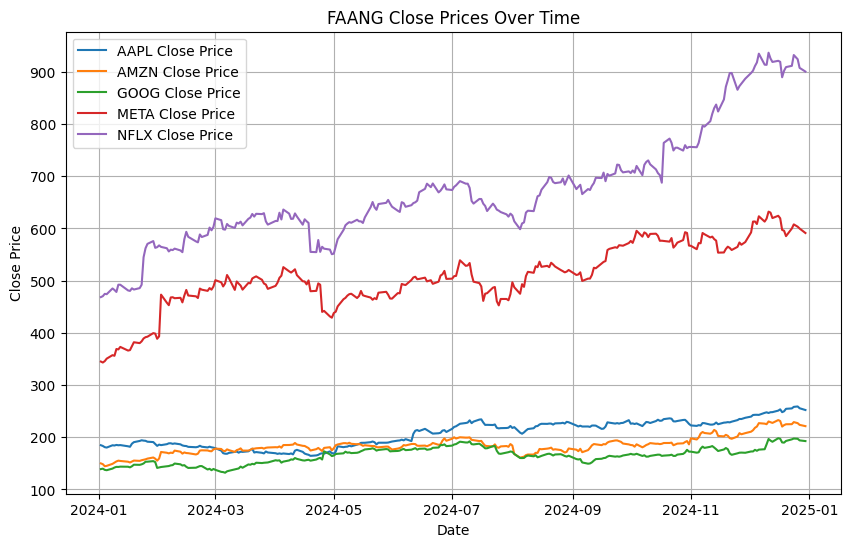

In [8]:
# Define a function to clean the datasets
def clean_dataset(filepath, column_names):
    """
    Cleans a dataset by:
    - Removing the first two rows (assumed to be metadata).
    - Renaming columns to a standardized format.
    - Converting numeric columns to proper data types.
    """
    # Load the dataset
    df = pd.read_csv(filepath)

    # Remove metadata rows and reset index
    df = df[2:].reset_index(drop=True)

    # Assign proper column names
    df.columns = column_names

    # Convert 'Date' column to datetime
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])

    # Convert numeric columns to appropriate types
    numeric_columns = [col for col in column_names if col != 'Date']
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

    return df

# Define the directory for datasets and filepaths
dataset_dir = r"C:\\Users\\alanm\\OneDrive\\Documents\\Hands-On-Data-Analysis-with-Pandas-2nd-edition\\Hands-On-Data-Analysis-with-Pandas-2nd-edition-1\\ch_07"

# Filepaths and column names for each dataset
datasets_info = {
    "^GSPC": (f"{dataset_dir}\\^GSPC_data.csv", ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']),
    "AAPL": (f"{dataset_dir}\\AAPL_data.csv", ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']),
    "AMZN": (f"{dataset_dir}\\AMZN_data.csv", ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']),
    "BTC-USD": (f"{dataset_dir}\\BTC-USD_data.csv", ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']),
    "GOOG": (f"{dataset_dir}\\GOOG_data.csv", ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']),
    "META": (f"{dataset_dir}\\META_data.csv", ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']),
    "NFLX": (f"{dataset_dir}\\NFLX_data.csv", ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']),
}

# Clean all datasets
cleaned_data = {name: clean_dataset(filepath, columns) for name, (filepath, columns) in datasets_info.items()}

# Visualization Code
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot for S&P 500 data
sns.pairplot(cleaned_data['^GSPC'][['High', 'Low', 'Close']], diag_kind="kde", kind="scatter", corner=True)
plt.suptitle("S&P 500 Pairplot", y=1.02)
plt.show()

# Time series plot for Bitcoin data
plt.figure(figsize=(10, 6))
plt.plot(cleaned_data['BTC-USD']['Date'], cleaned_data['BTC-USD']['Close'], label='Bitcoin Close Price')
plt.title('Bitcoin Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

# Correlation heatmap for Amazon data
plt.figure(figsize=(8, 6))
sns.heatmap(cleaned_data['AMZN'][['Close', 'High', 'Low', 'Open', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Amazon Data Correlation Heatmap')
plt.show()

# Line plot for FAANG stock prices (Close)
plt.figure(figsize=(10, 6))
for name in ['AAPL', 'AMZN', 'GOOG', 'META', 'NFLX']:
    plt.plot(cleaned_data[name]['Date'], cleaned_data[name]['Close'], label=f'{name} Close Price')
plt.title('FAANG Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()


In [9]:

# Data inspection (example for Apple stock)
print(aapl.head())


            AAPL_('Close', 'AAPL')  AAPL_('High', 'AAPL')  \
Date                                                        
2024-01-02              184.734985             187.521338   
2024-01-03              183.351746             184.973804   
2024-01-04              181.023163             182.197403   
2024-01-05              180.296707             181.869006   
2024-01-08              184.655365             184.695178   

            AAPL_('Low', 'AAPL')  AAPL_('Open', 'AAPL')  \
Date                                                      
2024-01-02            182.993517             186.237618   
2024-01-03            182.535736             183.321893   
2024-01-04            179.998185             181.261983   
2024-01-05            179.291637             181.102771   
2024-01-08            180.615161             181.202281   

            AAPL_('Volume', 'AAPL')  
Date                                 
2024-01-02                 82488700  
2024-01-03                 58414500  
2024-0

In [10]:

# Basic statistics
print(aapl.describe())


       AAPL_('Close', 'AAPL')  AAPL_('High', 'AAPL')  AAPL_('Low', 'AAPL')  \
count              251.000000             251.000000            251.000000   
mean               206.596169             208.292136            204.606815   
std                 25.617883              25.689309             25.236734   
min                164.405121             165.800067            163.488440   
25%                183.418907             184.522844            181.646251   
50%                213.757141             216.291416            211.442359   
75%                227.088608             228.990456            225.061156   
max                259.019989             260.100006            257.630005   

       AAPL_('Open', 'AAPL')  AAPL_('Volume', 'AAPL')  
count             251.000000             2.510000e+02  
mean              206.333798             5.719756e+07  
std                25.429415             3.087430e+07  
min               164.753864             2.323470e+07  
25%              

In [11]:

# Plot settings
sns.set_theme(style="whitegrid")


In [12]:
import seaborn as sns

# Selecting relevant columns (e.g., High, Low, Close) from the S&P 500 data
sp_viz = sp[['^GSPC_High', '^GSPC_Low', '^GSPC_Close']]

# Creating a pairplot
sns.pairplot(sp_viz, diag_kind="kde", kind="scatter", corner=True)
plt.suptitle("S&P 500 Pairplot", y=1.02)
plt.show()


KeyError: "None of [Index(['^GSPC_High', '^GSPC_Low', '^GSPC_Close'], dtype='object')] are in the [columns]"

[*********************100%***********************]  1 of 1 completed

Flattened Columns in Bitcoin DataFrame:
Index(['BTC-USD_('Close', 'BTC-USD')', 'BTC-USD_('High', 'BTC-USD')',
       'BTC-USD_('Low', 'BTC-USD')', 'BTC-USD_('Open', 'BTC-USD')',
       'BTC-USD_('Volume', 'BTC-USD')'],
      dtype='object')


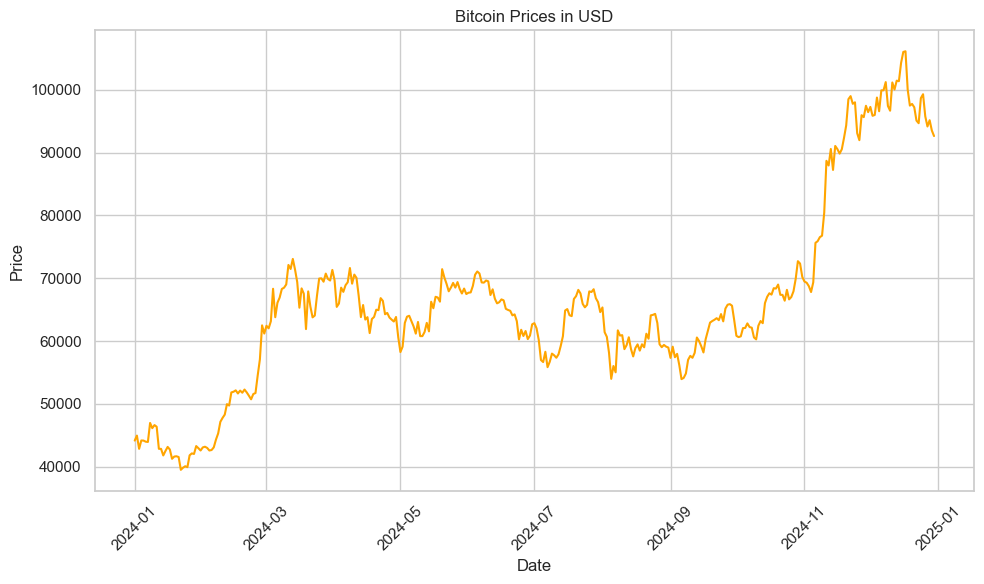

In [8]:

# Fetch data using yfinance
def fetch_stock_data(ticker):
    data = download(ticker, start=start_date, end=end_date)
    data.columns = [f"{ticker}_{col}" for col in data.columns]  # Prefix columns with ticker
    return data

# Re-fetch data with updated column naming
bitcoin = fetch_stock_data('BTC-USD')

# Debug: Check column names in bitcoin DataFrame
print("Flattened Columns in Bitcoin DataFrame:")
print(bitcoin.columns)

# Adjust for closing price column
closing_column = None
for col in bitcoin.columns:
    if 'close' in col.lower():  # Match 'Close' case-insensitively
        closing_column = col
        break

if closing_column is None:
    raise KeyError("Column for closing prices not found. Available columns: " + ', '.join(bitcoin.columns))

# Example plot: Bitcoin prices
plt.figure(figsize=(10, 6))
sns.lineplot(x=bitcoin.index, y=bitcoin[closing_column], color="orange")
plt.title("Bitcoin Prices in USD")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


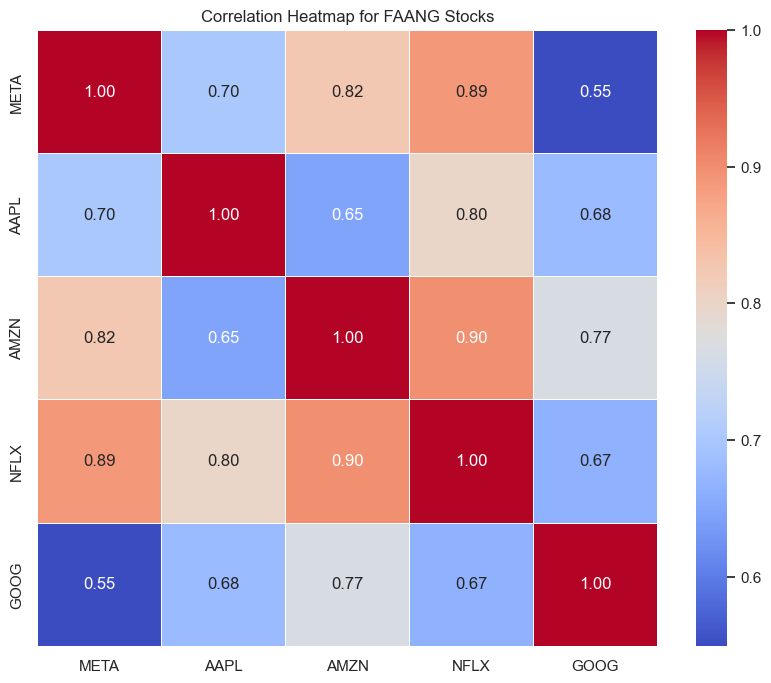

In [9]:
# Example correlation heatmap for FAANG stocks
faang.columns = ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG']  # Ensure correct column names
correlation_matrix = faang.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for FAANG Stocks")
plt.show()

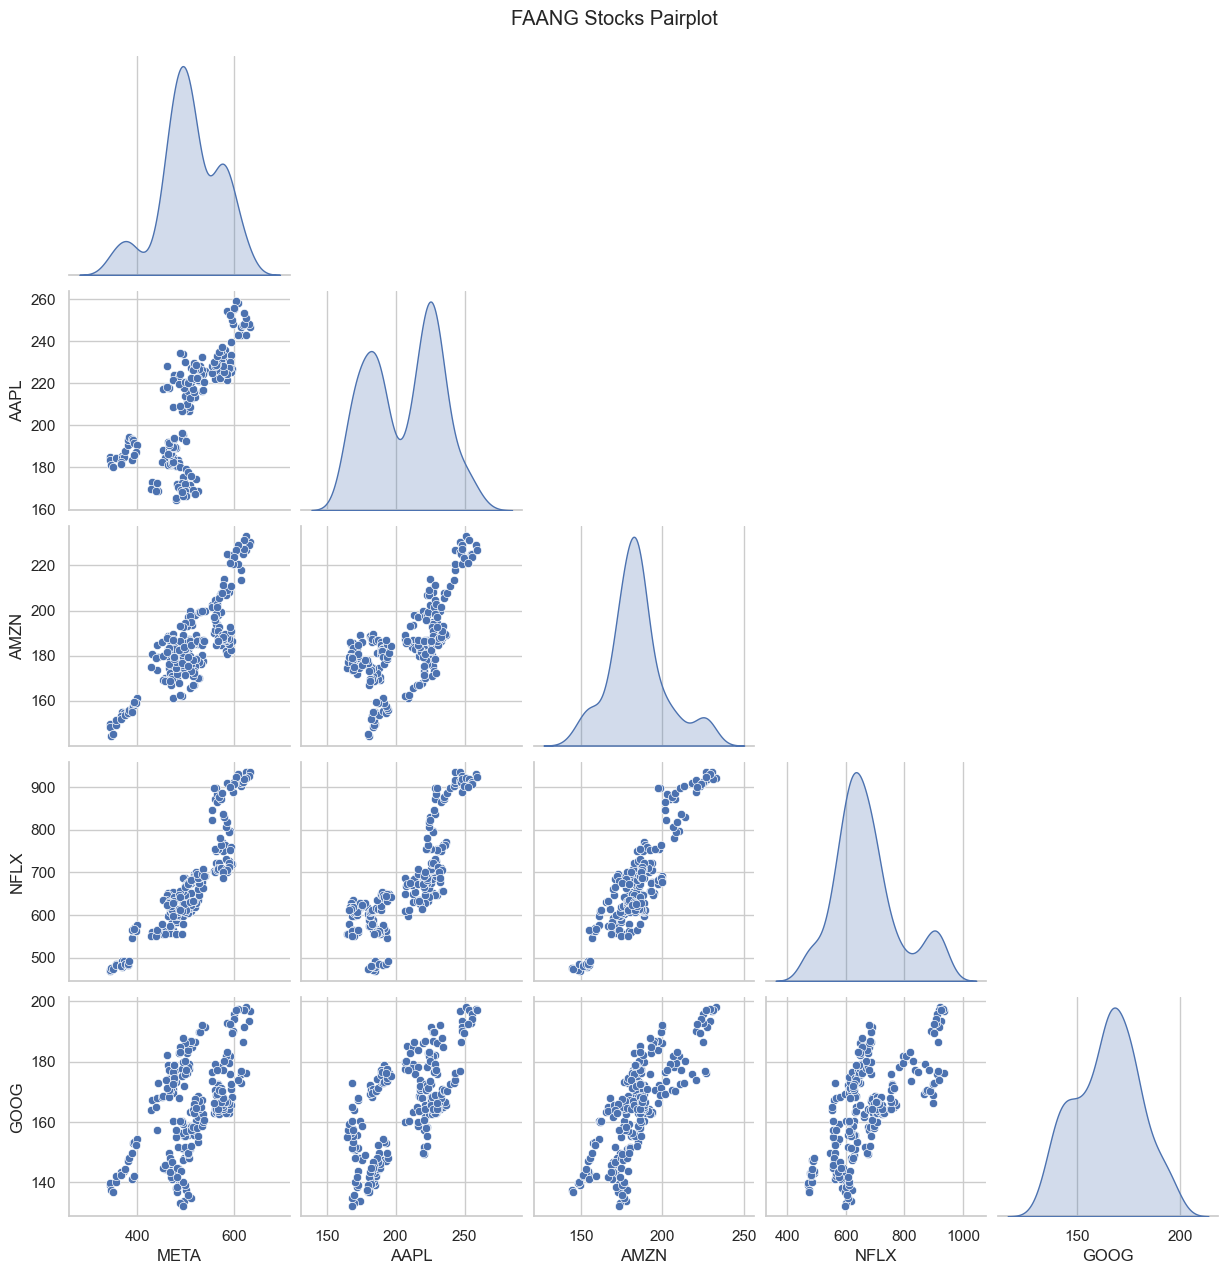

In [10]:
# Example pairplot for FAANG stocks
faang_viz = faang.reset_index(drop=True)  # Reset index for visualization
sns.pairplot(faang_viz, diag_kind="kde", kind="scatter", corner=True)
plt.suptitle("FAANG Stocks Pairplot", y=1.02)
plt.show()

In [11]:
print("Columns in Netflix DataFrame:", nflx.columns)


Columns in Netflix DataFrame: Index(['NFLX_('Close', 'NFLX')', 'NFLX_('High', 'NFLX')',
       'NFLX_('Low', 'NFLX')', 'NFLX_('Open', 'NFLX')',
       'NFLX_('Volume', 'NFLX')'],
      dtype='object')


In [12]:
# Ensure column names are correct
def fetch_stock_data(ticker):
    data = download(ticker, start=start_date, end=end_date)
    if 'Close' not in data.columns:
        raise KeyError(f"'Close' column is missing in the data for {ticker}. Available columns: {list(data.columns)}")
    return data

# Fetch Netflix data again for verification
nflx = fetch_stock_data('NFLX')
print("Columns in Netflix DataFrame:", nflx.columns)

# Custom Stock Analyzer Class
class StockAnalyzer:
    def __init__(self, data):
        self.data = data

    def annualized_volatility(self):
        if 'Close' not in self.data.columns:
            raise KeyError("'Close' column is missing in the DataFrame.")
        daily_returns = self.data['Close'].pct_change()
        return daily_returns.std() * np.sqrt(252)  # 252 trading days in a year

# Perform stock analysis on Netflix
nflx_analyzer = StockAnalyzer(nflx)
try:
    print("Netflix Annualized Volatility:", nflx_analyzer.annualized_volatility())
except KeyError as e:
    print(e)

# Repeat similar checks for all_assets


[*********************100%***********************]  1 of 1 completed

Columns in Netflix DataFrame: MultiIndex([( 'Close', 'NFLX'),
            (  'High', 'NFLX'),
            (   'Low', 'NFLX'),
            (  'Open', 'NFLX'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])
Netflix Annualized Volatility: Ticker
NFLX    0.295393
dtype: float64


C:\Users\alanm\AppData\Local\Temp\ipykernel_43036\3192339796.py:15: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().fillna(0)  # Calculate daily returns


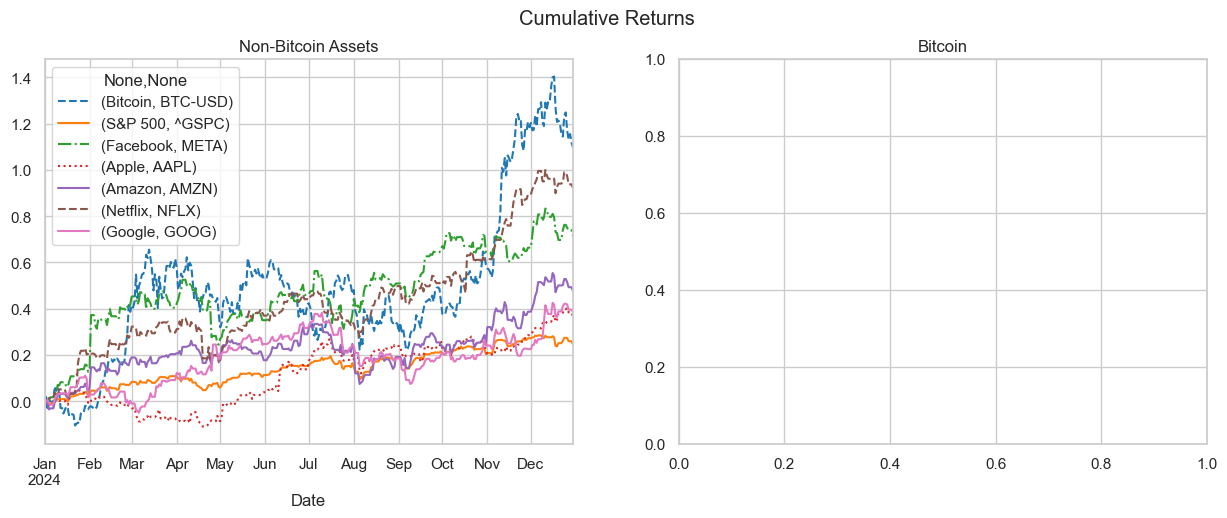

In [13]:
# Visualizing cumulative returns
from cycler import cycler

# Black-and-white visualization cycle
bw_viz_cycler = (
    cycler(color=[plt.get_cmap('tab10')(x / 10) for x in range(10)])
    + cycler(linestyle=['dashed', 'solid', 'dashdot', 'dotted', 'solid'] * 2)
)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].set_prop_cycle(bw_viz_cycler)

# Function to calculate cumulative returns
def calculate_cumulative_returns(data):
    returns = data.pct_change().fillna(0)  # Calculate daily returns
    cumulative_returns = (1 + returns).cumprod() - 1  # Calculate cumulative returns
    return cumulative_returns

# Calculate cumulative returns for all assets
cumulative_returns = calculate_cumulative_returns(all_assets)

for name in cumulative_returns.columns:
    if name == 'Bitcoin':
        cumulative_returns[name].plot(ax=axes[1], label=name, legend=True)
    else:
        cumulative_returns[name].plot(ax=axes[0], label=name, legend=True)

fig.suptitle('Cumulative Returns')
axes[0].set_title('Non-Bitcoin Assets')
axes[1].set_title('Bitcoin')
plt.show()


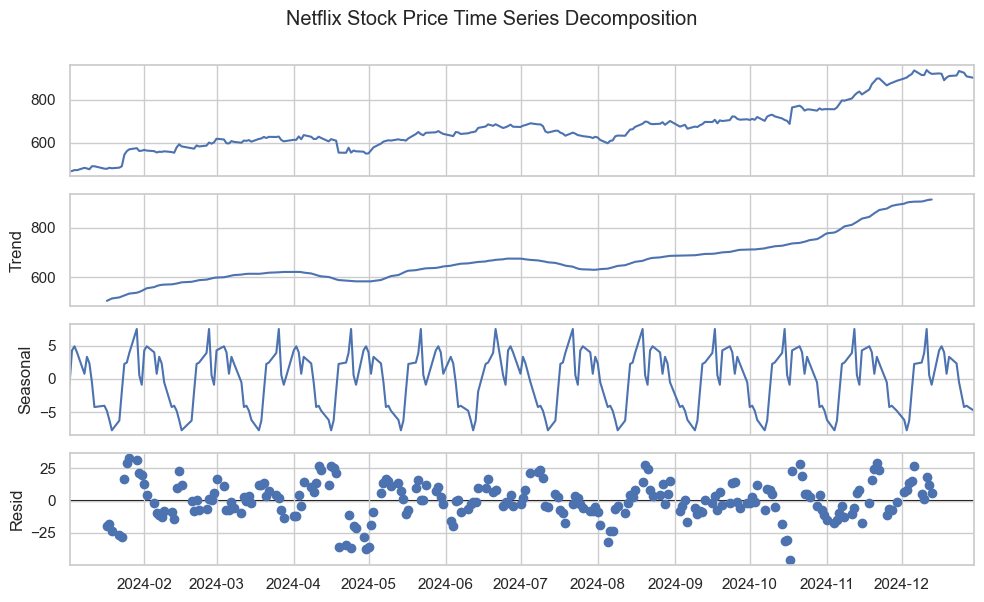

In [14]:
import statsmodels.api as sm

class StockModeler:
	@staticmethod
	def decompose(data, period):
		return sm.tsa.seasonal_decompose(data['Close'], period=period)

# Perform decomposition
decomposition = StockModeler.decompose(nflx, 20) # 20 period frequency
fig = decomposition.plot()
fig.suptitle('Netflix Stock Price Time Series Decomposition', y=1)
fig.set_figheight(6)
fig.set_figwidth(10)
fig.tight_layout()

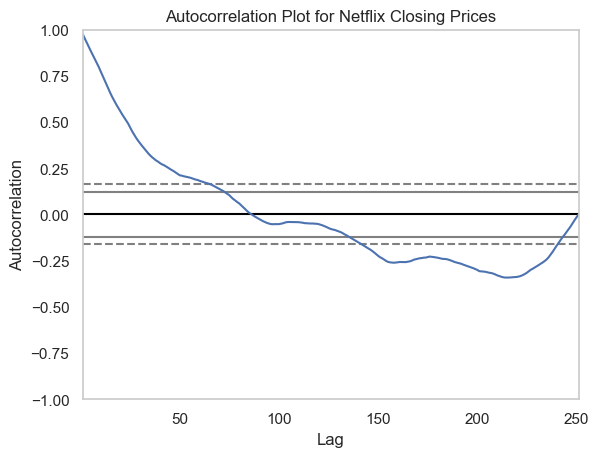

In [15]:
# Use the 'Close' column for the autocorrelation plot
from pandas.plotting import autocorrelation_plot

if 'Close' in nflx.columns:
    autocorrelation_plot(nflx['Close'])
    plt.title("Autocorrelation Plot for Netflix Closing Prices")
    plt.show()
else:
    print("The 'Close' column is not available in the Netflix DataFrame.")


In [16]:
# Define a placeholder for the risk-free rate retrieval
class Reader:
    @staticmethod
    def get_risk_free_rate_of_return():
        return 0.02  # Replace with dynamic retrieval logic if necessary

reader = Reader()

# Use the risk-free rate
r_f = reader.get_risk_free_rate_of_return()
print("Alpha:", all_assets_analyzer.analyze('alpha', index=sp, r_f=r_f))


NameError: name 'all_assets_analyzer' is not defined

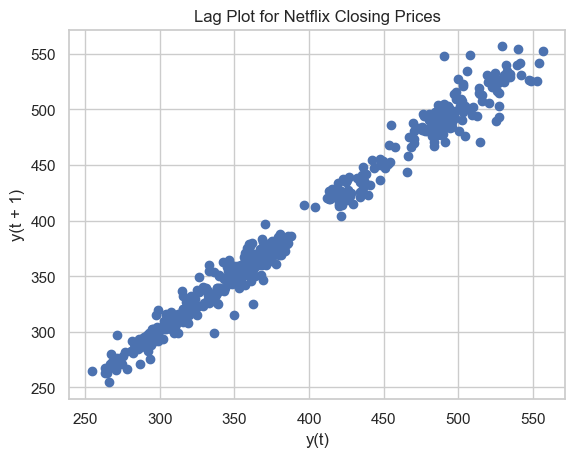

In [25]:
# Lag plot for Netflix stock
data_to_plot = nflx['Close'] if 'Close' in nflx.columns else None
if data_to_plot is not None:
    lag_plot(data_to_plot)
    plt.title("Lag Plot for Netflix Closing Prices")
    plt.show()
else:
    print("The 'Close' column is not available for Netflix data.")

c:\Users\alanm\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\alanm\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\alanm\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\alanm\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary startin

                               SARIMAX Results                                
Dep. Variable:                   NFLX   No. Observations:                  250
Model:                ARIMA(10, 1, 5)   Log Likelihood                -888.904
Date:                Wed, 08 Jan 2025   AIC                           1809.809
Time:                        16:32:52   BIC                           1866.088
Sample:                             0   HQIC                          1832.462
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5761      6.026      0.096      0.924     -11.234      12.386
ar.L2          0.2942      1.752      0.168      0.867      -3.140       3.728
ar.L3          0.1113      0.516      0.216      0.8

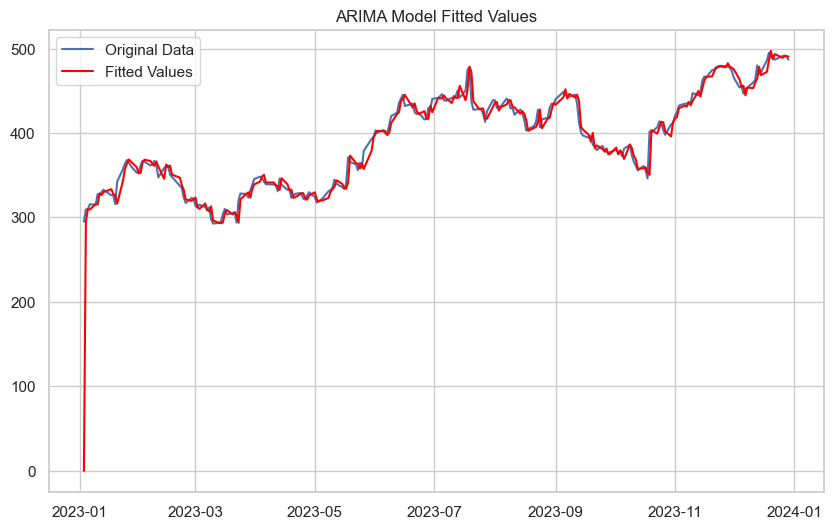

In [41]:
from statsmodels.tsa.arima.model import ARIMA

# Prepare the Netflix data for ARIMA modeling
if 'Close' in nflx.columns:
    nflx_close = nflx['Close'].dropna()  # Ensure no missing values
else:
    raise KeyError("The 'Close' column is not available in the Netflix data.")

# Define ARIMA parameters
ar_order = 10  # Autoregressive term
i_order = 1    # Differencing term
ma_order = 5   # Moving average term

# Fit the ARIMA model
arima_model = ARIMA(nflx_close, order=(ar_order, i_order, ma_order))
arima_result = arima_model.fit()

# Display the ARIMA model summary
print(arima_result.summary())

# Plot the fitted values
plt.figure(figsize=(10, 6))
plt.plot(nflx_close, label="Original Data")
plt.plot(arima_result.fittedvalues, label="Fitted Values", color="red")
plt.title("ARIMA Model Fitted Values")
plt.legend()
plt.show()


c:\Users\alanm\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\alanm\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\alanm\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\alanm\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary startin

                               SARIMAX Results                                
Dep. Variable:                   NFLX   No. Observations:                  250
Model:                ARIMA(10, 1, 5)   Log Likelihood                -888.904
Date:                Wed, 08 Jan 2025   AIC                           1809.809
Time:                        16:37:01   BIC                           1866.088
Sample:                             0   HQIC                          1832.462
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5761      6.026      0.096      0.924     -11.234      12.386
ar.L2          0.2942      1.752      0.168      0.867      -3.140       3.728
ar.L3          0.1113      0.516      0.216      0.8

c:\Users\alanm\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


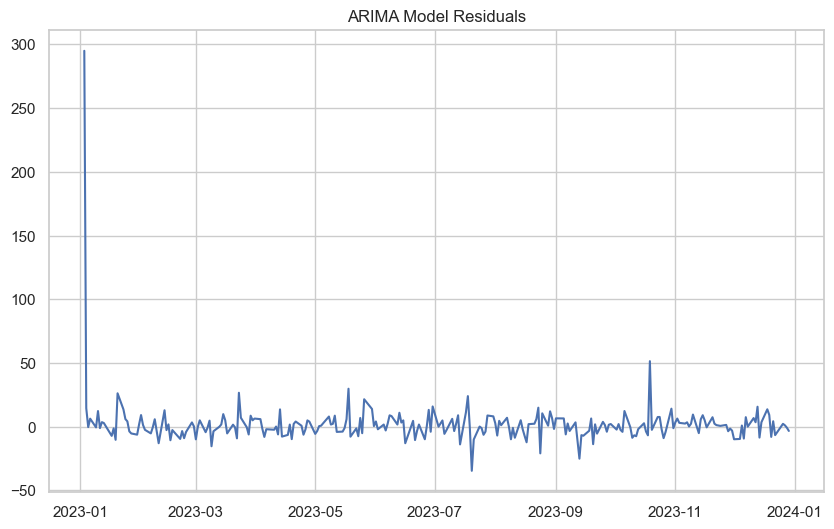

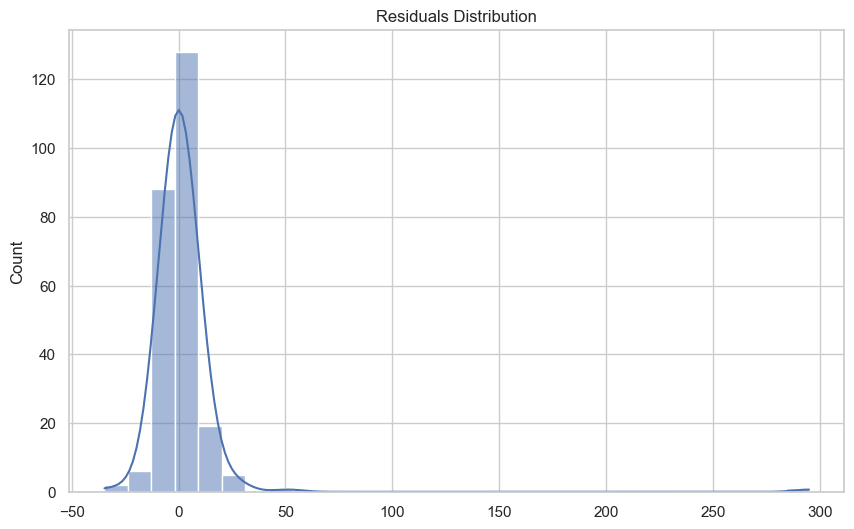

In [45]:
# ARIMA modeling for Netflix closing prices
if 'Close' in nflx.columns:
    nflx_close = nflx['Close'].dropna()
    arima_model = ARIMA(nflx_close, order=(10, 1, 5)).fit()
    print(arima_model.summary())

    # Plot residuals
    residuals = arima_model.resid
    plt.figure(figsize=(10, 6))
    plt.plot(residuals)
    plt.title("ARIMA Model Residuals")
    plt.show()

    # Plot residuals distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, bins=30)
    plt.title("Residuals Distribution")
    plt.show()
else:
    print("The 'Close' column is not available in the Netflix data.")


In [48]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

# Perform regression analysis for Netflix
if 'Close' in nflx.columns and 'Volume' in nflx.columns:
    X = sm.add_constant(nflx['Volume'])  # Independent variable (add constant for intercept)
    Y = nflx['Close']  # Dependent variable
    lm = OLS(Y, X).fit()
    print(lm.summary())
else:
    print("Regression analysis requires both 'Close' and 'Volume' columns in the Netflix data.")


                            OLS Regression Results                            
Dep. Variable:                   NFLX   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     12.59
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           0.000464
Time:                        16:40:41   Log-Likelihood:                -1349.3
No. Observations:                 250   AIC:                             2703.
Df Residuals:                     248   BIC:                             2710.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        409.7607      6.461     63.417      0.0

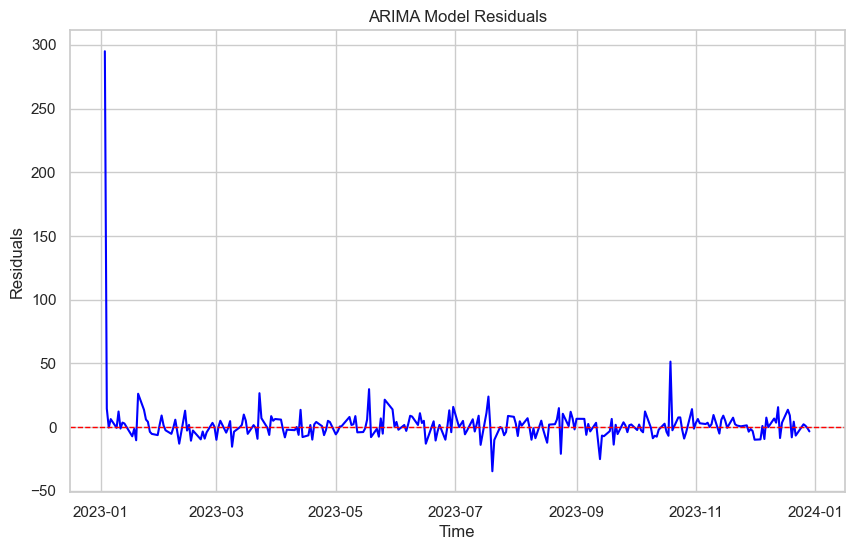

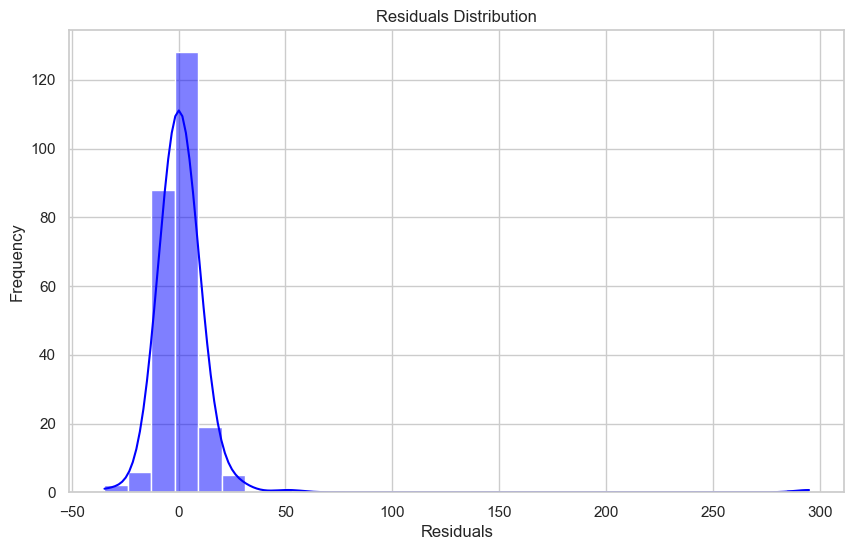

In [50]:
# Plot ARIMA residuals
if 'arima_model' in locals():
    residuals = arima_model.resid

    # Residual time series plot
    plt.figure(figsize=(10, 6))
    plt.plot(residuals, color='blue')
    plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
    plt.title("ARIMA Model Residuals")
    plt.xlabel("Time")
    plt.ylabel("Residuals")
    plt.show()

    # Residuals distribution plot
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, bins=30, color='blue')
    plt.title("Residuals Distribution")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("ARIMA model is not available.")


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

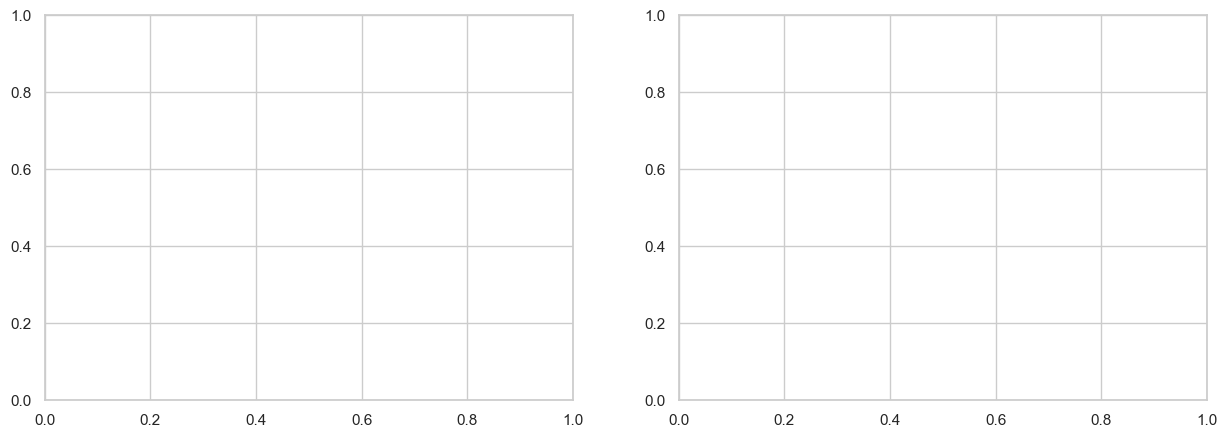

In [55]:
# ARIMA and Linear Regression Predictions
def plot_regression_predictions(data, model, start, end, ax, title, color):
    forecast_data = data.loc[start:end]
    if forecast_data.empty:
        raise ValueError(f"No data available for the date range {start} to {end}.")
    X_pred = add_constant(forecast_data['Volume'])
    Y_pred = model.predict(X_pred)
    forecast_index = forecast_data.index
    ax.plot(forecast_index, Y_pred, label='Regression forecast', color=color)
    ax.set_title(title)
    return ax

def plot_arima_predictions(data, model, start, end, ax, title, color):
    forecast = model.get_prediction(start=start, end=end)
    forecast_mean = forecast.predicted_mean
    forecast_ci = forecast.conf_int()
    forecast_mean.plot(ax=ax, label='ARIMA forecast', color=color)
    ax.fill_between(forecast_mean.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color=color, alpha=0.2)
    ax.set_title(title)
    return ax

start = dt.date(2021, 1, 1)
end = dt.date(2021, 1, 14)
jan = nflx.loc[start:end]
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

if 'arima_model' in locals():
    arima_ax = plot_arima_predictions(nflx, arima_model, start, end, axes[0], 'ARIMA', 'b')
    jan['Close'].plot(ax=arima_ax, style='b--', label='Actual Close')
    arima_ax.legend()
    arima_ax.set_ylabel('Price ($)')

if 'lm' in locals():
    try:
        linear_reg_ax = plot_regression_predictions(nflx, lm, start, end, axes[1], 'Linear Regression', 'b')
        jan['Close'].plot(ax=linear_reg_ax, style='b--', label='Actual Close')
        linear_reg_ax.legend()
        linear_reg_ax.set_ylabel('Price ($)')
    except ValueError as e:
        print(e)

plt.tight_layout()
plt.show()
